** Libreria necesaria para leer y archivos en formato .edf**

In [2]:
pip install mne

In [41]:
import pandas as pd
import numpy as np

import mne

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import datetime
import IPython
import IPython.display


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [6]:
edf3 = mne.io.read_raw_edf('chb01_03.edf')
edf4 = mne.io.read_raw_edf('chb01_04.edf')
edf15 = mne.io.read_raw_edf('chb01_15.edf')
edf16 = mne.io.read_raw_edf('chb01_16.edf')
edf18 = mne.io.read_raw_edf('chb01_18.edf')
edf21 = mne.io.read_raw_edf('chb01_21.edf')
edf26 = mne.io.read_raw_edf('chb01_26.edf')

Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_16.edf...
EDF file detected


<ipython-input-6-abae487f5b31>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf3 = mne.io.read_raw_edf('chb01_03.edf')
<ipython-input-6-abae487f5b31>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf4 = mne.io.read_raw_edf('chb01_04.edf')
<ipython-input-6-abae487f5b31>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf15 = mne.io.read_raw_edf('chb01_15.edf')
<ipython-input-6-abae487f5b31>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf16 = mne.io.read_raw_edf('chb01_16.edf')


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-abae487f5b31>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf18 = mne.io.read_raw_edf('chb01_18.edf')
<ipython-input-6-abae487f5b31>:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf21 = mne.io.read_raw_edf('chb01_21.edf')
<ipython-input-6-abae487f5b31>:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf26 = mne.io.read_raw_edf('chb01_26.edf')


In [7]:
header = ','.join(edf3.ch_names)

df3 = np.savetxt('chb01_3.csv', edf3.get_data().T, delimiter=',', header=header)
df3 = pd.read_csv('chb01_3.csv')

df4 = np.savetxt('chb01_4.csv', edf4.get_data().T, delimiter=',', header=header)
df4 = pd.read_csv('chb01_4.csv')

df15 = np.savetxt('chb01_15.csv', edf15.get_data().T, delimiter=',', header=header)
df15 = pd.read_csv('chb01_15.csv')

df16 = np.savetxt('chb01_16.csv', edf16.get_data().T, delimiter=',', header=header)
df16 = pd.read_csv('chb01_16.csv')

df18 = np.savetxt('chb01_18.csv', edf18.get_data().T, delimiter=',', header=header)
df18 = pd.read_csv('chb01_18.csv')

df21 = np.savetxt('chb01_21.csv', edf21.get_data().T, delimiter=',', header=header)
df21 = pd.read_csv('chb01_21.csv')

df26 = np.savetxt('chb01_26.csv', edf26.get_data().T, delimiter=',', header=header)
df26 = pd.read_csv('chb01_26.csv')


In [8]:
# acoto  a serie temporal teniendo en cuenta que debe haber 50% de la muestra pre.ictal y 50% ictal
#Ejecutar 1 sola vez
data3nsz = df3[2957*256:2997*256] # 40s no sz
data3sz = df3[2998*256:3038*256] # 40s sz

data4nsz = df4[1441*256:1468*256] # 27s  no sz
data4sz = df4[1469*256:1496*256] # 27s sz

data15nsz = df15[1693*256:1733*256] # 40s no sz
data15sz = df15[1734*256:1774*256] # 40s sz

data16nsz = df16[965*256:1016*256] # 51s no sz
data16sz = df16[1017*256:1068*256] # 51s sz

data18nsz = df18[1631*256:1721*256] # 90s no sz
data18sz = df18[1722*256:1812*256] # 90s sz

data21nsz = df21[235*256:328*256] # 93s no sz
data21sz = df21[329*256:422*256] # 93s sz

data26nsz = df26[1762*256:1863*256] # 101s no sz
data26sz = df26[1864*256:1965*256] # 101s sz

In [81]:
data26sz

,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Labels
477184,-0.000051,-0.000017,-0.000033,0.000029,-0.000049,0.000008,-0.000021,-0.000011,0.000011,-0.000055,...,0.000015,0.000036,-0.000006,-0.000053,0.000034,-0.000004,-0.000025,-0.000026,0.000015,1
477185,-0.000063,-0.000015,-0.000028,0.000035,-0.000061,0.000014,-0.000012,-0.000012,0.000014,-0.000055,...,0.000003,0.000049,-0.000006,-0.000042,0.000029,-0.000005,-0.000016,-0.000026,0.000003,1
477186,-0.000049,-0.000010,-0.000020,0.000037,-0.000049,0.000021,-0.000001,-0.000014,0.000019,-0.000056,...,0.000006,0.000055,-0.000011,-0.000025,0.000021,-0.000011,-0.000010,-0.000027,0.000006,1
477187,-0.000048,-0.000002,-0.000015,0.000038,-0.000051,0.000029,0.000006,-0.000012,0.000012,-0.000054,...,0.000045,0.000044,-0.000018,-0.000012,0.000015,-0.000012,-0.000021,-0.000036,0.000045,1
477188,-0.000032,0.000002,-0.000010,0.000038,-0.000040,0.000035,0.000012,-0.000010,0.000019,-0.000057,...,0.000079,0.000046,-0.000024,0.000001,0.000011,-0.000013,-0.000034,-0.000049,0.000079,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503035,0.000010,0.000205,0.000060,-0.000025,0.000127,0.000080,0.000035,0.000006,0.000239,0.000060,...,-0.000017,0.000067,0.000043,0.000076,-0.000059,-0.000053,0.000130,-0.000109,-0.000017,1
503036,-0.000015,0.000212,0.000062,-0.000031,0.000108,0.000083,0.000037,-0.000003,0.000238,0.000065,...,-0.000047,0.000086,0.000048,0.000080,-0.000062,-0.000052,0.000135,-0.000092,-0.000047,1
503037,-0.000027,0.000214,0.000060,-0.000029,0.000103,0.000088,0.000033,-0.000008,0.000247,0.000065,...,-0.000059,0.000083,0.000044,0.000085,-0.000059,-0.000049,0.000142,-0.000083,-0.000059,1
503038,-0.000028,0.000205,0.000059,-0.000035,0.000100,0.000084,0.000030,-0.000015,0.000256,0.000057,...,-0.000062,0.000072,0.000040,0.000081,-0.000059,-0.000038,0.000144,-0.000076,-0.000062,1


In [46]:
# Concatenar los DataFrames

df3c = pd.concat([data3nsz, data3sz])
df4c = pd.concat([data4nsz, data4sz])
df15c = pd.concat([data15nsz, data15sz])
df16c = pd.concat([data16nsz, data16sz])
df18c = pd.concat([data18nsz, data18sz])
df21c = pd.concat([data21nsz, data21sz])
df26c = pd.concat([data26nsz, data26sz])

df = pd.concat([df3c, df4c, df15c, df16c, df18c, df21c, df26c])

In [13]:
#print(pd.value_counts(df['Labels'], sort = True))
#df['Labels'].astype(bool)

756992    False
756993    False
756994    False
756995    False
756996    False
          ...  
503035     True
503036     True
503037     True
503038     True
503039     True
Name: Labels, Length: 226304, dtype: bool

In [47]:
df = df.reset_index()

In [48]:
# (#datos,media,desviacion estadar,minimo, quartiles(25,50,75),maximos)
dfT = df.describe().transpose()
#dfT

In [49]:
#PUNTO FUERTE A TRABAJAR DIVISION DE LOS DATOS DE ENTRENAMIENTO

#column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)

#-60% para entrenamiento
train_df = df[0:int(n*0.6)]

#-25% para validacion
val_df = df[int(n*0.6):int(n*0.85)]

#-15% para test
test_df = df[int(n*0.85):]

#num_features = df.shape[1]

In [50]:
print(len(train_df), 'train')
print(len(val_df), 'validation')
print(len(test_df), 'test')

135782 train
56576 validation
33946 test


In [68]:
df

,index,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Labels
0,756992,-0.000027,2.539683e-06,0.000016,0.000003,0.000008,-0.000014,-4.493284e-06,0.000006,0.000049,...,0.000002,-0.000026,-0.000033,-0.000020,-0.000015,0.000012,0.000003,0.000007,0.000002,0
1,756993,-0.000032,1.758242e-06,0.000015,0.000005,0.000006,-0.000022,-5.860806e-07,0.000008,0.000048,...,-0.000002,-0.000035,-0.000038,-0.000026,-0.000014,0.000009,0.000013,0.000006,-0.000002,0
2,756994,-0.000035,1.758242e-06,0.000013,0.000004,0.000004,-0.000026,-9.768010e-07,0.000008,0.000047,...,-0.000005,-0.000047,-0.000040,-0.000031,-0.000013,0.000009,0.000020,0.000004,-0.000005,0
3,756995,-0.000034,9.768010e-07,0.000014,0.000002,0.000003,-0.000027,-9.768010e-07,0.000008,0.000046,...,-0.000008,-0.000038,-0.000041,-0.000030,-0.000013,0.000011,0.000020,0.000003,-0.000008,0
4,756996,-0.000033,1.953602e-07,0.000014,0.000003,0.000004,-0.000029,1.367521e-06,0.000009,0.000044,...,-0.000009,-0.000027,-0.000042,-0.000028,-0.000013,0.000015,0.000020,0.000001,-0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226299,503035,0.000010,2.045421e-04,0.000060,-0.000025,0.000127,0.000080,3.496947e-05,0.000006,0.000239,...,-0.000017,0.000067,0.000043,0.000076,-0.000059,-0.000053,0.000130,-0.000109,-0.000017,1
226300,503036,-0.000015,2.115751e-04,0.000062,-0.000031,0.000108,0.000083,3.731380e-05,-0.000003,0.000238,...,-0.000047,0.000086,0.000048,0.000080,-0.000062,-0.000052,0.000135,-0.000092,-0.000047,1
226301,503037,-0.000027,2.135287e-04,0.000060,-0.000029,0.000103,0.000088,3.340659e-05,-0.000008,0.000247,...,-0.000059,0.000083,0.000044,0.000085,-0.000059,-0.000049,0.000142,-0.000083,-0.000059,1
226302,503038,-0.000028,2.045421e-04,0.000059,-0.000035,0.000100,0.000084,2.989011e-05,-0.000015,0.000256,...,-0.000062,0.000072,0.000040,0.000081,-0.000059,-0.000038,0.000144,-0.000076,-0.000062,1


#Datos desequilibrados

In [166]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [83]:
df = pd.concat([df3,df4,df15,df16,df18,df21,df26])
df

,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-1.777778e-05,3.926740e-05,-3.711844e-06,8.400488e-06,-5.860806e-07,4.102564e-06,3.770452e-05,-1.504274e-05,-1.738706e-05,-4.512821e-05,...,-1.068620e-04,-5.997558e-05,1.803175e-04,-1.855922e-05,8.537241e-05,4.102564e-06,2.090354e-05,-9.181929e-06,-3.965812e-05,-5.997558e-05
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
3,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,-1.953602e-07,1.953602e-07,5.860806e-07,...,-9.768010e-07,1.953602e-07,2.148962e-06,5.860806e-07,5.860806e-07,1.953602e-07,1.367521e-06,-1.953602e-07,-1.953602e-07,1.953602e-07
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,2.148962e-06,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595195,3.731380e-05,1.152625e-05,-7.619048e-06,1.816850e-05,4.122100e-05,3.711844e-06,-9.572650e-06,2.442002e-05,1.035409e-05,6.056166e-06,...,-2.949939e-05,2.989011e-05,1.387057e-05,2.989011e-05,-4.551893e-05,8.009768e-06,-2.871795e-05,-5.645910e-05,-4.493284e-06,2.989011e-05
595196,2.754579e-05,9.963370e-06,-8.400488e-06,1.308913e-05,3.692308e-05,1.953602e-07,-1.035409e-05,1.504274e-05,1.347985e-05,5.860806e-07,...,-3.770452e-05,2.793651e-05,1.934066e-05,2.481074e-05,-4.903541e-05,8.791209e-06,-2.559219e-05,-6.427350e-05,-8.791209e-06,2.793651e-05
595197,2.715507e-05,4.884005e-06,-1.113553e-05,1.426129e-05,3.692308e-05,5.860806e-07,-1.426129e-05,1.152625e-05,3.321123e-06,1.953602e-07,...,-5.098901e-05,4.630037e-05,2.598291e-05,1.582418e-05,-3.887668e-05,1.152625e-05,-1.855922e-05,-7.755800e-05,-1.777778e-05,4.630037e-05
595198,2.910867e-05,2.539683e-06,-1.191697e-05,1.113553e-05,4.161172e-05,2.930403e-06,-1.777778e-05,3.321123e-06,-5.860806e-07,2.148962e-06,...,-5.763126e-05,6.427350e-05,2.832723e-05,9.963370e-06,-3.223443e-05,1.230769e-05,-1.660562e-05,-8.693529e-05,-2.324786e-05,6.427350e-05


In [84]:
df['Labels'] = 0

In [89]:
df = df.reset_index()
df

,level_0,index,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Labels
0,0,0,-1.777778e-05,3.926740e-05,-3.711844e-06,8.400488e-06,-5.860806e-07,4.102564e-06,3.770452e-05,-1.504274e-05,...,-5.997558e-05,1.803175e-04,-1.855922e-05,8.537241e-05,4.102564e-06,2.090354e-05,-9.181929e-06,-3.965812e-05,-5.997558e-05,0
1,1,1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
2,2,2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
3,3,3,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,-1.953602e-07,...,1.953602e-07,2.148962e-06,5.860806e-07,5.860806e-07,1.953602e-07,1.367521e-06,-1.953602e-07,-1.953602e-07,1.953602e-07,0
4,4,4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,2.148962e-06,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124795,6124795,595195,3.731380e-05,1.152625e-05,-7.619048e-06,1.816850e-05,4.122100e-05,3.711844e-06,-9.572650e-06,2.442002e-05,...,2.989011e-05,1.387057e-05,2.989011e-05,-4.551893e-05,8.009768e-06,-2.871795e-05,-5.645910e-05,-4.493284e-06,2.989011e-05,0
6124796,6124796,595196,2.754579e-05,9.963370e-06,-8.400488e-06,1.308913e-05,3.692308e-05,1.953602e-07,-1.035409e-05,1.504274e-05,...,2.793651e-05,1.934066e-05,2.481074e-05,-4.903541e-05,8.791209e-06,-2.559219e-05,-6.427350e-05,-8.791209e-06,2.793651e-05,0
6124797,6124797,595197,2.715507e-05,4.884005e-06,-1.113553e-05,1.426129e-05,3.692308e-05,5.860806e-07,-1.426129e-05,1.152625e-05,...,4.630037e-05,2.598291e-05,1.582418e-05,-3.887668e-05,1.152625e-05,-1.855922e-05,-7.755800e-05,-1.777778e-05,4.630037e-05,0
6124798,6124798,595198,2.910867e-05,2.539683e-06,-1.191697e-05,1.113553e-05,4.161172e-05,2.930403e-06,-1.777778e-05,3.321123e-06,...,6.427350e-05,2.832723e-05,9.963370e-06,-3.223443e-05,1.230769e-05,-1.660562e-05,-8.693529e-05,-2.324786e-05,6.427350e-05,0


In [97]:
df.rename(columns = {'level' : 'indice','indice' :'num. muestra'}, inplace = True)
#df

,indice,num. muestra,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Labels
0,0,0,-1.777778e-05,3.926740e-05,-3.711844e-06,8.400488e-06,-5.860806e-07,4.102564e-06,3.770452e-05,-1.504274e-05,...,-5.997558e-05,1.803175e-04,-1.855922e-05,8.537241e-05,4.102564e-06,2.090354e-05,-9.181929e-06,-3.965812e-05,-5.997558e-05,0
1,1,1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
2,2,2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
3,3,3,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,-1.953602e-07,...,1.953602e-07,2.148962e-06,5.860806e-07,5.860806e-07,1.953602e-07,1.367521e-06,-1.953602e-07,-1.953602e-07,1.953602e-07,0
4,4,4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,2.148962e-06,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124795,6124795,595195,3.731380e-05,1.152625e-05,-7.619048e-06,1.816850e-05,4.122100e-05,3.711844e-06,-9.572650e-06,2.442002e-05,...,2.989011e-05,1.387057e-05,2.989011e-05,-4.551893e-05,8.009768e-06,-2.871795e-05,-5.645910e-05,-4.493284e-06,2.989011e-05,0
6124796,6124796,595196,2.754579e-05,9.963370e-06,-8.400488e-06,1.308913e-05,3.692308e-05,1.953602e-07,-1.035409e-05,1.504274e-05,...,2.793651e-05,1.934066e-05,2.481074e-05,-4.903541e-05,8.791209e-06,-2.559219e-05,-6.427350e-05,-8.791209e-06,2.793651e-05,0
6124797,6124797,595197,2.715507e-05,4.884005e-06,-1.113553e-05,1.426129e-05,3.692308e-05,5.860806e-07,-1.426129e-05,1.152625e-05,...,4.630037e-05,2.598291e-05,1.582418e-05,-3.887668e-05,1.152625e-05,-1.855922e-05,-7.755800e-05,-1.777778e-05,4.630037e-05,0
6124798,6124798,595198,2.910867e-05,2.539683e-06,-1.191697e-05,1.113553e-05,4.161172e-05,2.930403e-06,-1.777778e-05,3.321123e-06,...,6.427350e-05,2.832723e-05,9.963370e-06,-3.223443e-05,1.230769e-05,-1.660562e-05,-8.693529e-05,-2.324786e-05,6.427350e-05,0


In [102]:
df = df.drop(['Label'], axis=1)

In [187]:
df = df.drop(['indice'], axis = 1)
df = df.drop( ['num. muestra'], axis = 1)

In [189]:
df.loc[2996*256:3036*256,['Labels']] = 1

df.loc[3600*256+1467*256:3600*256+1494*256,['Labels']] = 1

df.loc[3600*256*2+1732*256:3600*256*2+1772*256,['Labels']] = 1

df.loc[3600*256*3+1015*256:3600*256*3+1066*256,['Labels']] = 1

df.loc[3600*256*4+1720*256:3600*256*4+1810*256,['Labels']] = 1

df.loc[3600*256*5+327*256:3600*256*5+420*256,['Labels']] = 1

df.loc[3600*256*6+1862*256:3600*256*6+1963*256,['Labels']] = 1

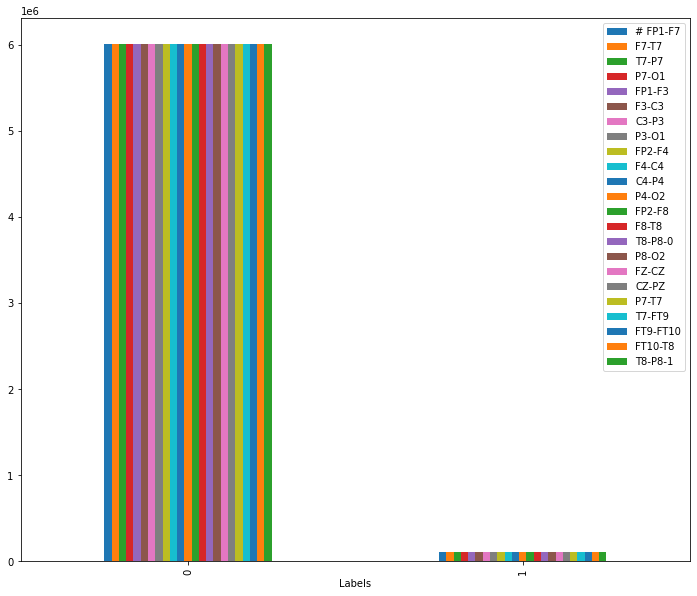

In [190]:
df.groupby('Labels').count().plot(kind='bar')

In [114]:
neg, pos = np.bincount(df['Labels'])
total = neg + pos
print('Muestras:\n   total: {}\n     Positivos: {} ({:.2f}% del total)\n'.format(total, pos, 100*pos / total))

Muestras:
   total: 6124800
     Positivos: 113159 (1.85% del total)



In [115]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [116]:
train_labels = np.array(train_df.pop('Labels'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Labels'))
test_labels = np.array(test_df.pop('Labels'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [128]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
pip install seaborn

In [131]:
import seaborn as sns

In [119]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (4287360,)
Validation labels shape: (1224960,)
Test labels shape: (612480,)
Training features shape: (4287360, 25)
Validation features shape: (1224960, 25)
Test features shape: (612480, 25)


In [123]:
df.columns

Index(['indice', 'num. muestra', '# FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1',
       'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4',
       'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ',
       'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1', 'Labels'],
      dtype='object')

C:\Users\Dibio-hardpreform\miniconda2\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dibio-hardpreform\miniconda2\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


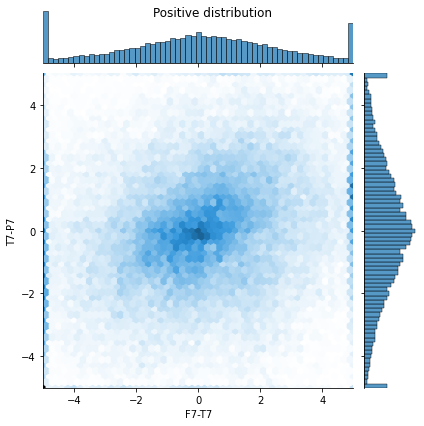

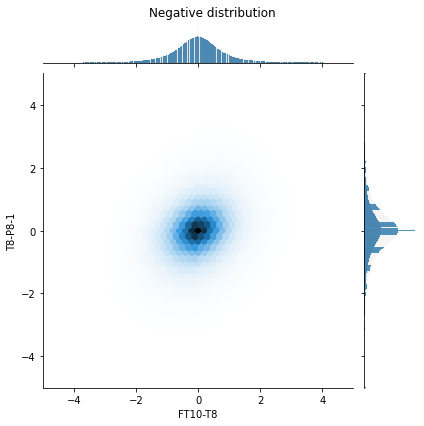

In [132]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['F7-T7'], pos_df['T7-P7'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['FT10-T8'], neg_df['T8-P8-1'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

Comprender métricas útiles
Tenga en cuenta que hay algunas métricas definidas anteriormente que pueden ser calculadas por el modelo y que serán útiles al evaluar el desempeño.

Los falsos negativos y los falsos positivos son muestras que se clasificaron incorrectamente
Los verdaderos negativos y verdaderos positivos son muestras que se clasificaron correctamente
La precisión es el porcentaje de ejemplos clasificados correctamente> 
La precisión es el porcentaje de predicciones positivas que se clasificaron correctamente> 
Recordar es el porcentaje de positivos reales que se clasificaron correctamente> 
AUC se refiere al área bajo la curva de una curva característica de funcionamiento del receptor (ROC-AUC). Esta métrica es igual a la probabilidad de que un clasificador clasifique una muestra aleatoria positiva más alta que una muestra aleatoria negativa.

In [134]:
from tensorflow import keras

In [191]:
# profundizar en el analicis de distribucion de los casos
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [202]:
def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(24, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias),
  ])
  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [205]:
#LSTM
#model = keras.Sequential()
#model.add(
#    keras.layers.Bidirectional(
#        keras.layers.LSTM(
#        units=128,
#        input_shape=(train_features.shape[-1],)),
#        )
#    )
#model.add(keras.layers.Dropout(rate=0.2))
#model.add(keras.layers.Dense(units=1))
#model.compile(loss='mean_squared_error', optimizer='adam')

In [206]:
#model.fit(
#    train_features.shape[-1],
#    epochs=10,
#    batch_size=12,
#    validation_split=0.1,
#    shuffle=True
#)

In [203]:
EPOCHS = 10
BATCH_SIZE = 1279

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [204]:
model = make_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                624       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 25        
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.predict(train_features[:10])

array([[0.68085355],
       [0.34990096],
       [0.34990096],
       [0.34964913],
       [0.35028696],
       [0.3572688 ],
       [0.3553671 ],
       [0.3456067 ],
       [0.35698515],
       [0.35708776]], dtype=float32)

In [142]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5209


In [143]:
initial_bias = np.log([pos/neg])
initial_bias

array([-3.97265913])

In [144]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.05591869],
       [0.02523732],
       [0.02523735],
       [0.02515733],
       [0.025244  ],
       [0.02526   ],
       [0.02534145],
       [0.02536955],
       [0.02492077],
       [0.02517523]], dtype=float32)

### sesgo inicial correcto

In [145]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0947


In [147]:
import tempfile

In [148]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [149]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [150]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [151]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

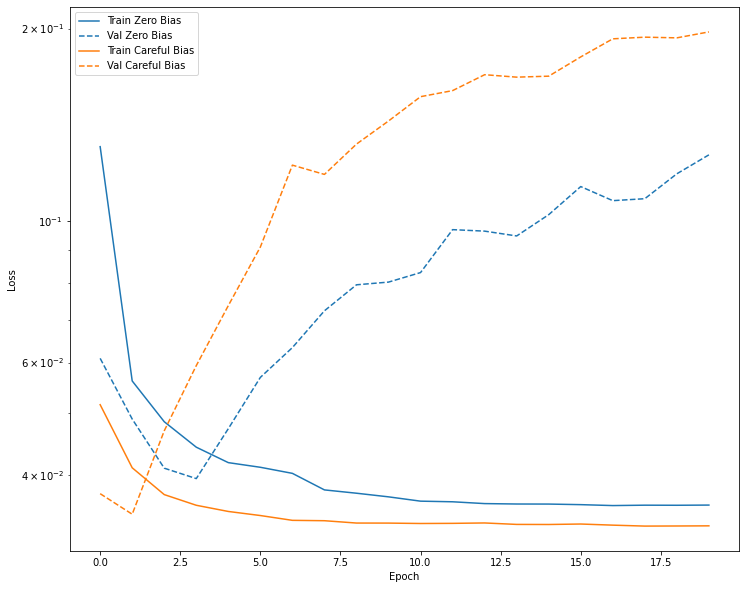

In [179]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

### Entrenar al modelo 

In [153]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 4287360 samples, validate on 1224960 samples
Epoch 1/10
4287360/4287360 [==============================] - 49s 11us/sample - loss: 0.0513 - tp: 13303.0000 - fp: 6106.0000 - tn: 4217761.0000 - fn: 50190.0000 - accuracy: 0.9869 - precision: 0.6854 - recall: 0.2095 - auc: 0.8930 - val_loss: 0.0374 - val_tp: 9653.0000 - val_fp: 875.0000 - val_tn: 1200276.0000 - val_fn: 14156.0000 - val_accuracy: 0.9877 - val_precision: 0.9169 - val_recall: 0.4054 - val_auc: 0.9859
Epoch 2/10
4287360/4287360 [==============================] - 42s 10us/sample - loss: 0.0404 - tp: 21570.0000 - fp: 7883.0000 - tn: 4215984.0000 - fn: 41923.0000 - accuracy: 0.9884 - precision: 0.7324 - recall: 0.3397 - auc: 0.9494 - val_loss: 0.0318 - val_tp: 11714.0000 - val_fp: 1079.0000 - val_tn: 1200072.0000 - val_fn: 12095.0000 - val_accuracy: 0.9892 - val_precision: 0.9157 - val_recall: 0.4920 - val_auc: 0.9858
Epoch 3/10
4287360/4287360 [==============================] - 43s 10us/sample - loss: 0.0370 - tp: 24435

In [154]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


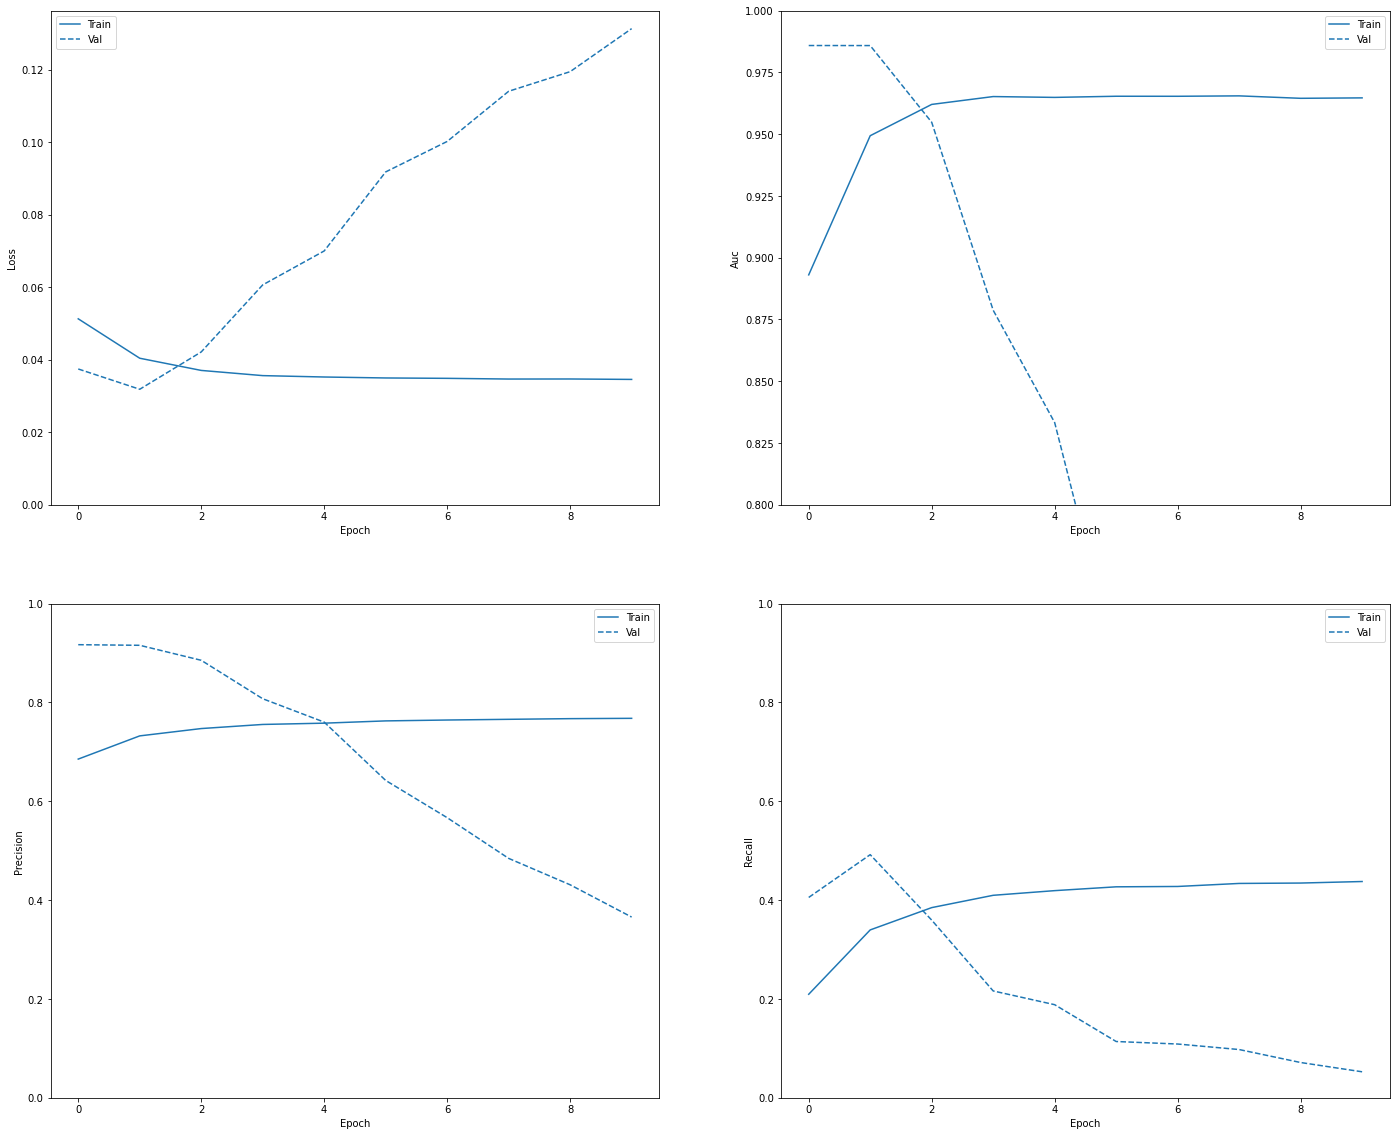

In [155]:
plot_metrics(baseline_history)

In [156]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [162]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Predijo una no SZ y era una no SZ (True Negatives): ', cm[0][0])
  print('Predijo una  SZ y era una no SZd (False Positives): ', cm[0][1])
  print('Predijo una no SZ y era una SZ (False Negatives): ', cm[1][0])
  print('Predijo SZ y era una SZ (True Positives): ', cm[1][1])
  print('Total SZ: ', np.sum(cm[1]))

loss :  1.9031687822430239
tp :  0.0
fp :  50413.0
tn :  536210.0
fn :  25857.0
accuracy :  0.8754735
precision :  0.0
recall :  0.0
auc :  0.27369878

Predijo una no SZ y era una no SZ (True Negatives):  536210
Predijo una  SZ y era una no SZd (False Positives):  50413
Predijo una no SZ y era una SZ (False Negatives):  25857
Predijo SZ y era una SZ (True Positives):  0
Total SZ:  25857


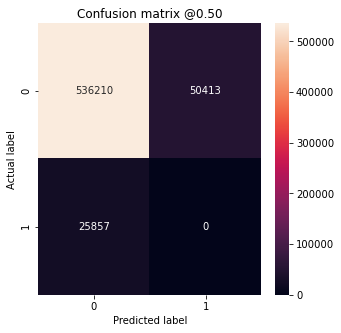

In [163]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [164]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

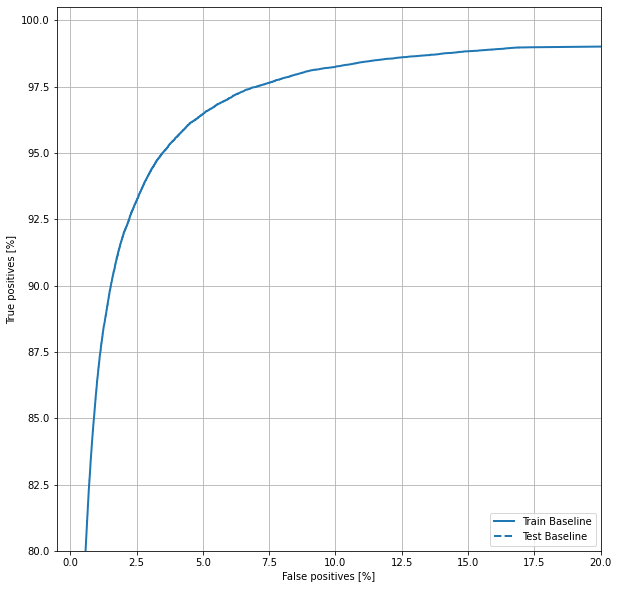

In [167]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [168]:
### Def mi problema

In [169]:
#Pesos de clase
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 27.06


In [170]:
# modelo con ponderaciones de clase
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Train on 4287360 samples, validate on 1224960 samples
Epoch 1/10
4287360/4287360 [==============================] - 45s 10us/sample - loss: 0.3505 - tp: 47490.0000 - fp: 382711.0000 - tn: 3841156.0000 - fn: 16003.0000 - accuracy: 0.9070 - precision: 0.1104 - recall: 0.7480 - auc: 0.9096 - val_loss: 0.2126 - val_tp: 22334.0000 - val_fp: 96730.0000 - val_tn: 1104421.0000 - val_fn: 1475.0000 - val_accuracy: 0.9198 - val_precision: 0.1876 - val_recall: 0.9380 - val_auc: 0.9767
Epoch 2/10
4287360/4287360 [==============================] - 38s 9us/sample - loss: 0.2454 - tp: 52793.0000 - fp: 283617.0000 - tn: 3940250.0000 - fn: 10700.0000 - accuracy: 0.9314 - precision: 0.1569 - recall: 0.8315 - auc: 0.9581 - val_loss: 0.1782 - val_tp: 21601.0000 - val_fp: 54646.0000 - val_tn: 1146505.0000 - val_fn: 2208.0000 - val_accuracy: 0.9536 - val_precision: 0.2833 - val_recall: 0.9073 - val_auc: 0.9828
Epoch 3/10
4287360/4287360 [==============================] - 39s 9us/sample - loss: 0.2230 - tp: 5

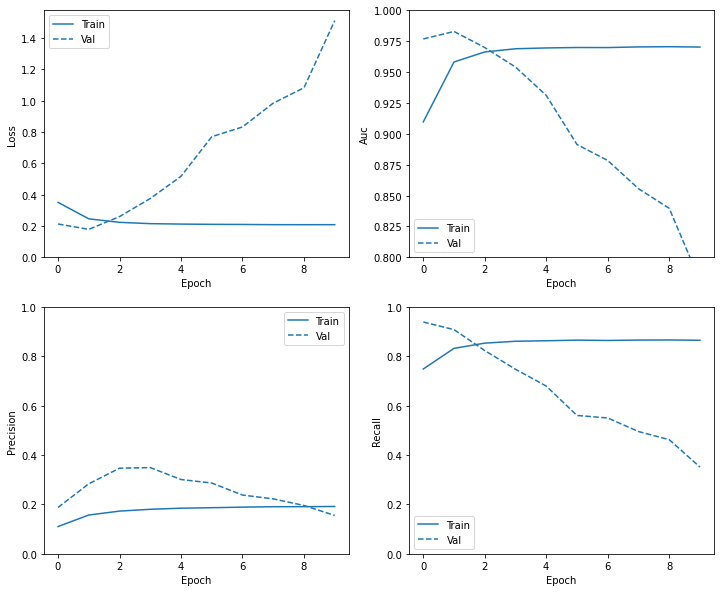

In [171]:
plot_metrics(weighted_history)

In [172]:
#Evaluar metricas

In [173]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  1.0554802305653546
tp :  501.0
fp :  157262.0
tn :  429361.0
fn :  25356.0
accuracy :  0.70183843
precision :  0.0031756496
recall :  0.019375797
auc :  0.28589386

Predijo una no SZ y era una no SZ (True Negatives):  429361
Predijo una  SZ y era una no SZd (False Positives):  157262
Predijo una no SZ y era una SZ (False Negatives):  25356
Predijo SZ y era una SZ (True Positives):  501
Total SZ:  25857


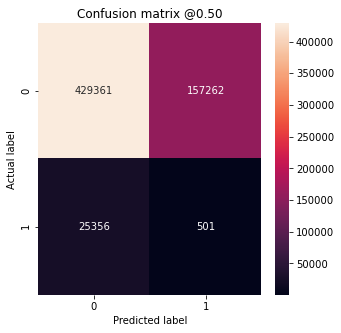

In [174]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

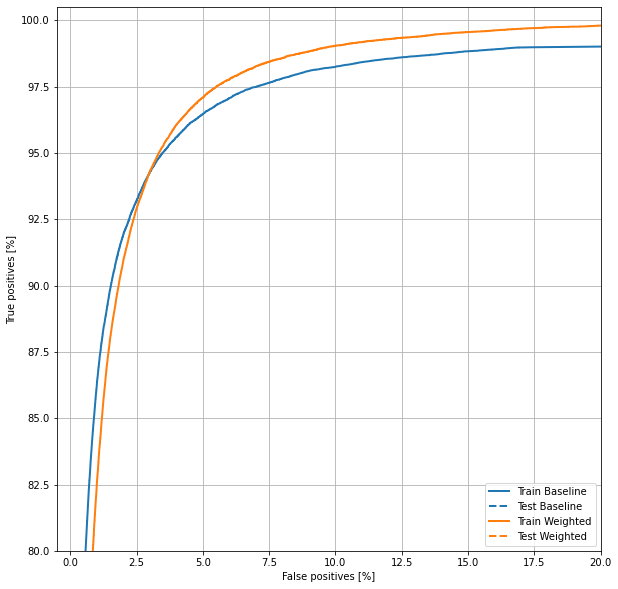

In [175]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')#corregir falsos positivos

2.0.0


In [207]:
df.columns

Index(['# FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1', 'Labels'],
      dtype='object')

train_data = (df['# FP1-F7'], df['F7-T7'], df['T7-P7'], df['P7-O1'], df['FP1-F3'], df['F3-C3'], df['C3-P3'],
       df['P3-O1'], df['FP2-F4'], df['F4-C4'], df['C4-P4'], df['P4-O2'], df['FP2-F8'],df[ 'F8-T8'],
       df['T8-P8-0'], df['P8-O2'], df['FZ-CZ'],df[ 'CZ-PZ'], df['P7-T7'], df['T7-FT9'], df['FT9-FT10'],
       df['FT10-T8'], df['T8-P8-1'])
train_data = np.asarray(train_data)

train_lables = np.array(df['Labels'])

In [226]:
n = len(df)
train_data = df[0:int(n*0.7)]
val_data = df[int(n*0.7):int(n*0.9)]
test_data = df[int(n*0.9):]

train_data = (train_data['# FP1-F7'], train_data['F7-T7'], train_data['T7-P7'], train_data['P7-O1'], train_data['FP1-F3'], train_data['F3-C3'], train_data['C3-P3'],
       train_data['P3-O1'], train_data['FP2-F4'], train_data['F4-C4'], train_data['C4-P4'], train_data['P4-O2'], train_data['FP2-F8'],train_data[ 'F8-T8'],
       train_data['T8-P8-0'], train_data['P8-O2'], train_data['FZ-CZ'],train_data[ 'CZ-PZ'], train_data['P7-T7'], train_data['T7-FT9'], train_data['FT9-FT10'],
       train_data['FT10-T8'], train_data['T8-P8-1'])
train_data = np.asarray(train_data)